In [1]:
#notebook to compare our autoencoder clustering to our kmeans clustering

#there is nothing here that requires a gpu, let's run on a cpu

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np


import matplotlib.pyplot as plt

plt.style.use('demo_style.mplstyle')

#colormap for spectrograms
colormap='viridis'

In [2]:
#load our data

q003_data = np.load('/Users/stephey/Dropbox/NERSC/Work/Dates/20200630/q003_data.npy')
#q003_max = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_max.npy')
#q003_norm = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_norm.npy')

q103_data = np.load('/Users/stephey/Dropbox/NERSC/Work/Dates/20200630/q103_data.npy') 
#q103_max = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_max.npy')
#q103_norm = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_norm.npy')

#add in our post-quench data
#need to cut that down to size, too

pq_data = np.load('/Users/stephey/Dropbox/NERSC/Work/Dates/20200630/pq_data.npy')
#pq_data = np.load('/Users/stephey/Dropbox/NERSC/Work/Dates/20200630/pq_norm.npy')

#we shuffle in the training so it's ok
qall_data = np.concatenate((q003_data, q103_data, pq_data), axis=0)

print(qall_data.shape)


(9807, 625, 512)


In [3]:
#load our encoded and pca data

encoded_all = np.load('encoded_all.npy')


In [4]:

#Try pca on encoded images
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#need to flatten i guess?
img_pca = pca.fit_transform(encoded_all)

In [5]:
#boundary 1
boundary1 = q003_data.shape[0]

#boundary2
boundary2 = q003_data.shape[0] + q103_data.shape[0]

color_key=['red','blue','green']
color_label=[]
for i in range(qall_data.shape[0]):
    if i <= boundary1:
        color_label.append(color_key[0])
    elif boundary1 < i <= boundary2:
        color_label.append(color_key[1])
    else:
        color_label.append(color_key[2])

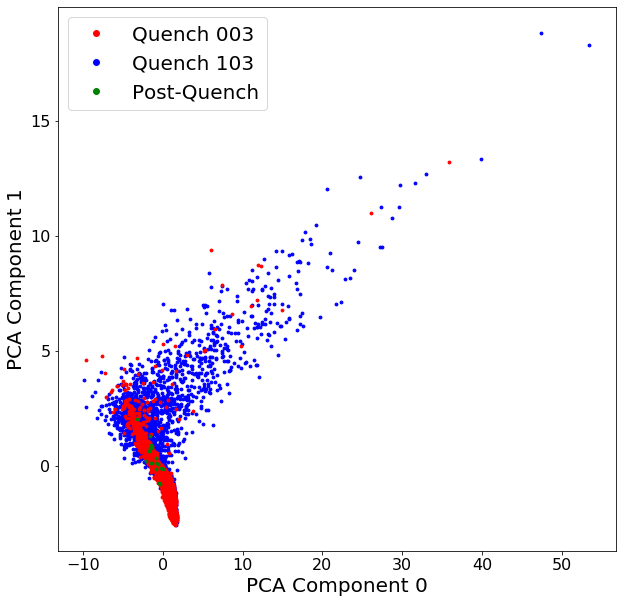

In [6]:
#plot together

msize = 8
xlimits = (-20,50)
ylimits = (-5,20)

#hack the legend together
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


legend_elements = [Line2D([0], [0], marker='o', color='w', label='Quench 003',
                          markerfacecolor='red', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Quench 103',
                          markerfacecolor='blue', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Post-Quench',
                          markerfacecolor='green', markersize=8),]

fig = plt.figure()
fig.set_size_inches(10,10)
for i in range(qall_data.shape[0]):
    if boundary1 < i <= boundary2: #first q103
        plt.scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize, zorder=1)
    elif i <= boundary1: #then q003
        plt.scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize, zorder=5)
    else: #then pq
        plt.scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize, zorder=10)
plt.xlabel('PCA Component 0')
plt.ylabel('PCA Component 1')
plt.legend(handles=legend_elements)
plt.show()        



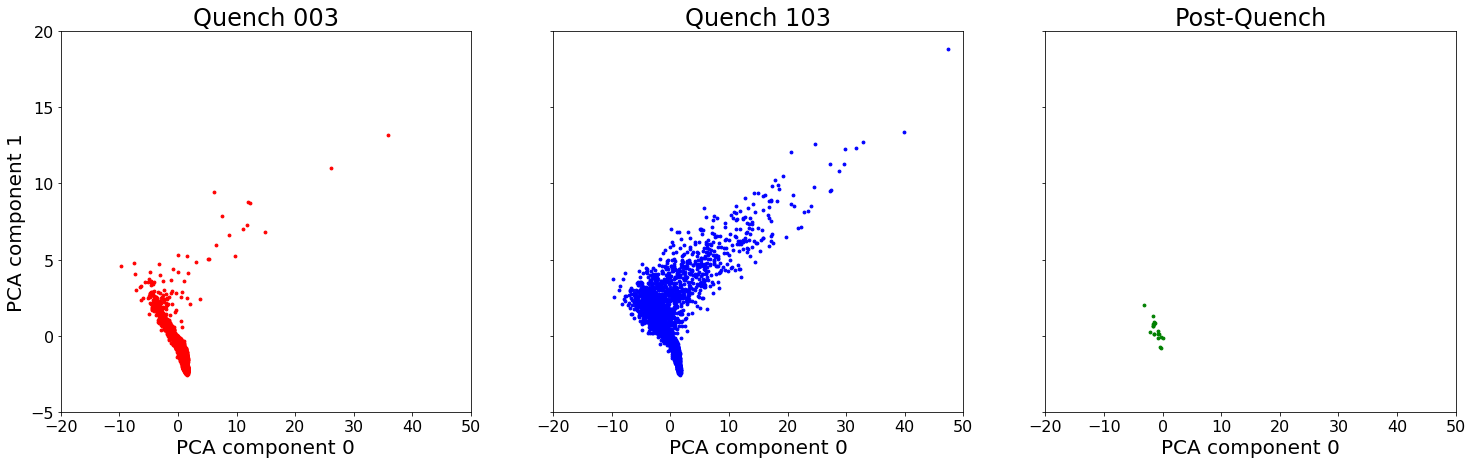

In [7]:
#plot separately

msize = 8
xlimits = (-20,50)
ylimits = (-5,20)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25,7)
for i in range(qall_data.shape[0]):
    if i <= boundary1:
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
        axs[0].set_xlim(xlimits)
        axs[0].set_ylim(ylimits)  
    elif boundary1 < i <= boundary2:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')
        axs[1].set_xlim(xlimits)
        axs[1].set_ylim(ylimits)  
    else:
        axs[2].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[2].set_title('Post-Quench')
        axs[2].set_xlim(xlimits)
        axs[2].set_ylim(ylimits)  
        
        

for ax in axs.flat:
    ax.set(xlabel='PCA component 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [8]:
#select and plot some spectrograms (3) from each region and with each label

#divide the PCA space into 3 regions-- left v, center v, right v

xpad=6
ypad=2
num_images = 3

#right v
rx=15
ry=7
rightvxmin = rx-xpad
rightvxmax = rx+xpad
rightvymin = ry-ypad
rightvymax = ry+ypad

#left v
lx=-6
ly=4
leftvxmin = lx-xpad 
leftvxmax = lx+xpad
leftvymin = ly-ypad 
leftvymax = ly+ypad

#bottom v
bx=0
by=-1
bottomvxmin = bx-xpad 
bottomvxmax = bx+xpad
bottomvymin = by-ypad 
bottomvymax = by+ypad




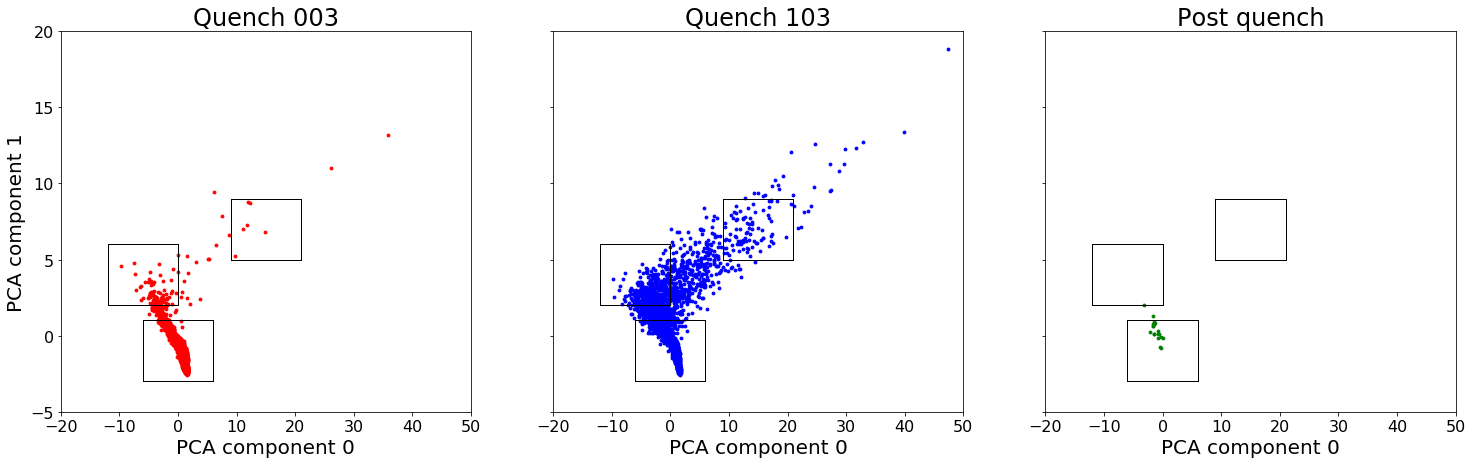

In [9]:
#draw boxes that show where our pca samples come from

import matplotlib.patches as patches

msize = 8
xlimits = (-20,50)
ylimits = (-5,20)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25,7)
for i in range(qall_data.shape[0]):
    if i <= boundary1:
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
        axs[0].set_xlim(xlimits)
        axs[0].set_ylim(ylimits)  
        axs[0].add_patch(patches.Rectangle((leftvxmin, leftvymin), xpad*2, ypad*2, fill=False))
        axs[0].add_patch(patches.Rectangle((bottomvxmin, bottomvymin), xpad*2, ypad*2, fill=False)) 
        axs[0].add_patch(patches.Rectangle((rightvxmin, rightvymin), xpad*2, ypad*2, fill=False)) 
    elif boundary1 < i <= boundary2:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')
        axs[1].set_xlim(xlimits)
        axs[1].set_ylim(ylimits)  
        axs[1].add_patch(patches.Rectangle((leftvxmin, leftvymin), xpad*2, ypad*2, fill=False))
        axs[1].add_patch(patches.Rectangle((bottomvxmin, bottomvymin), xpad*2, ypad*2, fill=False)) 
        axs[1].add_patch(patches.Rectangle((rightvxmin, rightvymin), xpad*2, ypad*2, fill=False))         
    else:
        axs[2].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[2].set_title('Post quench')
        axs[2].set_xlim(xlimits)
        axs[2].set_ylim(ylimits)  
        axs[2].add_patch(patches.Rectangle((leftvxmin, leftvymin), xpad*2, ypad*2, fill=False))
        axs[2].add_patch(patches.Rectangle((bottomvxmin, bottomvymin), xpad*2, ypad*2, fill=False)) 
        axs[2].add_patch(patches.Rectangle((rightvxmin, rightvymin), xpad*2, ypad*2, fill=False)) 
      

for ax in axs.flat:
    ax.set(xlabel='PCA component 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

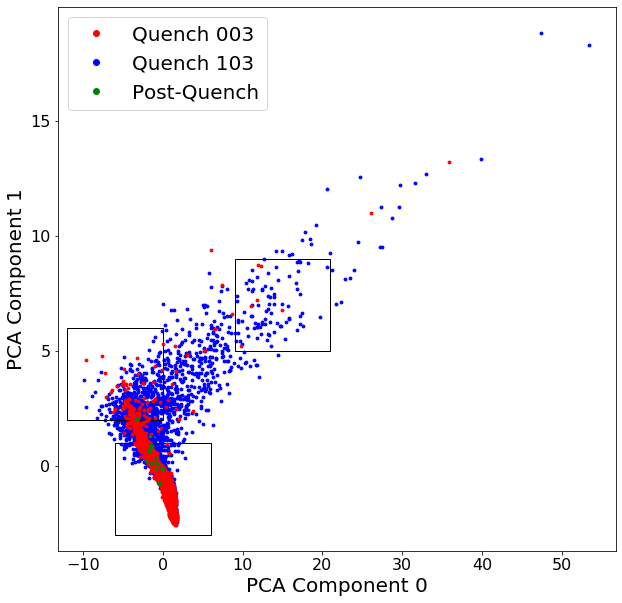

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
for i in range(qall_data.shape[0]):
    if boundary1 < i <= boundary2: #first q103
        plt.scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize, zorder=1)
    elif i <= boundary1: #then q003
        plt.scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize, zorder=5)
    else: #then pq
        plt.scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize, zorder=10)
ax.add_patch(patches.Rectangle((leftvxmin, leftvymin), xpad*2, ypad*2, fill=False))
ax.add_patch(patches.Rectangle((bottomvxmin, bottomvymin), xpad*2, ypad*2, fill=False)) 
ax.add_patch(patches.Rectangle((rightvxmin, rightvymin), xpad*2, ypad*2, fill=False))         
plt.xlabel('PCA Component 0')
plt.ylabel('PCA Component 1')
plt.legend(handles=legend_elements)
plt.show()  

q003_bottom
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 24

<Figure size 2160x720 with 0 Axes>

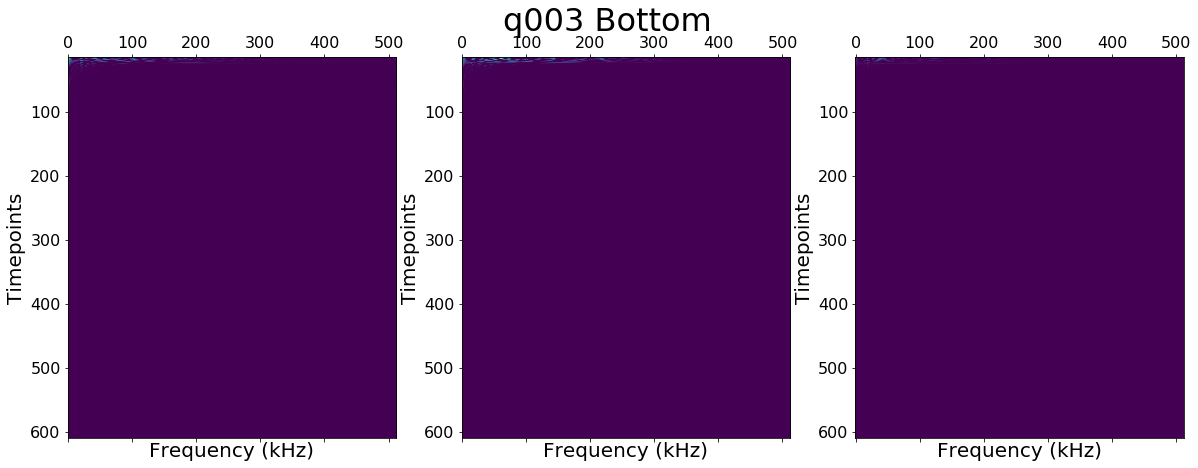

In [11]:
#quench 3 bottom

from matplotlib.pyplot import matshow

q003_bottom = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= boundary1):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (bottomvxmin<pca0<bottomvxmax) and (bottomvymin<pca1<bottomvymax):
            q003_bottom.append(i)
        
print("q003_bottom")        
print(q003_bottom)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_bottom, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_l.set_xlabel('Frequency (kHz)')
ax_l.set_ylabel('Timepoints')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_c.set_xlabel('Frequency (kHz)')
ax_c.set_ylabel('Timepoints')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
ax_r.set_xlabel('Frequency (kHz)')
ax_r.set_ylabel('Timepoints')
fig.suptitle('q003 Bottom', fontsize=32)
plt.show()

q003_left
[74, 185, 235, 243, 282, 294, 310, 352, 364, 365, 368, 419, 483, 565, 607, 614, 662, 663, 710, 719, 737, 787, 808, 838, 879, 891, 897, 913, 952, 1037, 1086, 1165, 1206, 1255, 1265, 1270, 1336, 1398, 1410, 1433, 1471, 1507, 1515, 1562, 1568, 1585, 1589, 1592, 1659, 1733, 1745, 1798, 1804, 1819, 1903, 1984, 1991, 2029, 2048, 2050, 2052, 2174, 2210, 2228, 2238, 2249, 2267, 2306, 2316, 2361, 2362, 2386, 2462, 2473, 2479, 2586, 2638, 2645, 2662, 2685, 2687, 2741, 2753, 2768, 2835, 2852, 2882, 2914, 2944, 2973, 2991, 3043, 3058, 3128, 3144]
These are the random images we chose to display:
[2306 2741 1562]


<Figure size 2160x720 with 0 Axes>

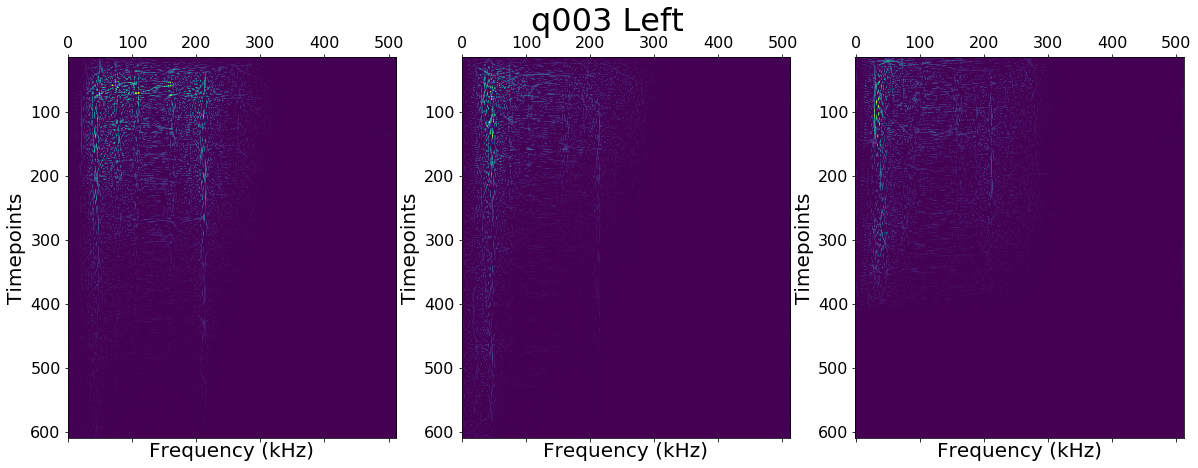

In [12]:
#quench 3 left

from matplotlib.pyplot import matshow

q003_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= boundary1):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q003_left.append(i)
        
print("q003_left")        
print(q003_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_l.set_xlabel('Frequency (kHz)')
ax_l.set_ylabel('Timepoints')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_c.set_xlabel('Frequency (kHz)')
ax_c.set_ylabel('Timepoints')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
ax_r.set_xlabel('Frequency (kHz)')
ax_r.set_ylabel('Timepoints')
fig.suptitle('q003 Left', fontsize=32)
plt.show()

q003_right
[606, 991, 1252, 1257, 1494, 2380]
These are the random images we chose to display:
[1494  606 1252]


<Figure size 2160x720 with 0 Axes>

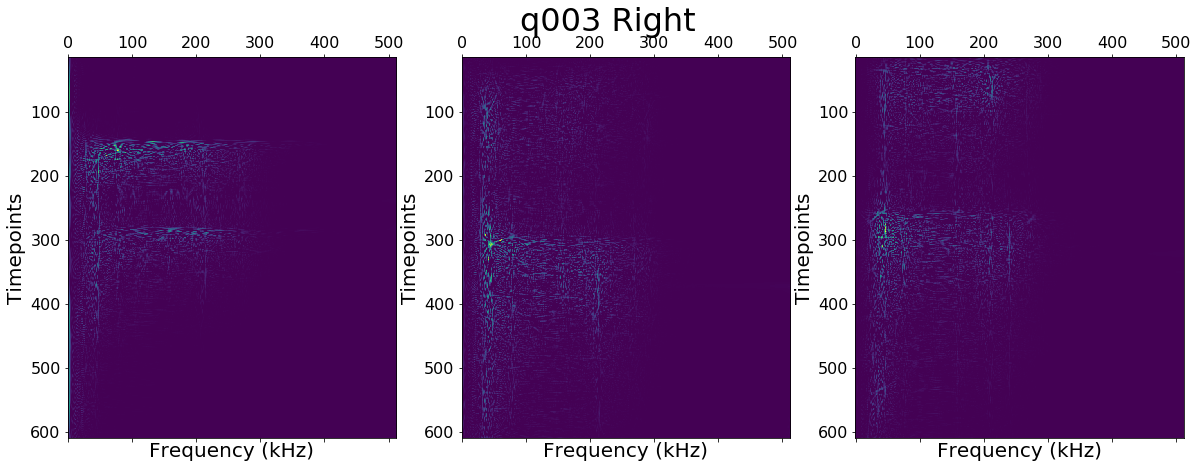

In [18]:
#quench 3 right

from matplotlib.pyplot import matshow

q003_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= boundary1):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q003_right.append(i)
        
print("q003_right")        
print(q003_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_l.set_xlabel('Frequency (kHz)')
ax_l.set_ylabel('Timepoints')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_c.set_xlabel('Frequency (kHz)')
ax_c.set_ylabel('Timepoints')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
ax_r.set_xlabel('Frequency (kHz)')
ax_r.set_ylabel('Timepoints')
fig.suptitle('q003 Right', fontsize=32)
plt.show()

q103_bottom
[3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3246, 3247, 3249, 3251, 3252, 3253, 3254, 3255, 3256, 3258, 3259, 3260, 3261, 3263, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3278, 3279, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3292, 3293, 3294, 3295, 3297, 3298, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3333, 3334, 3335, 3336, 333

<Figure size 2160x720 with 0 Axes>

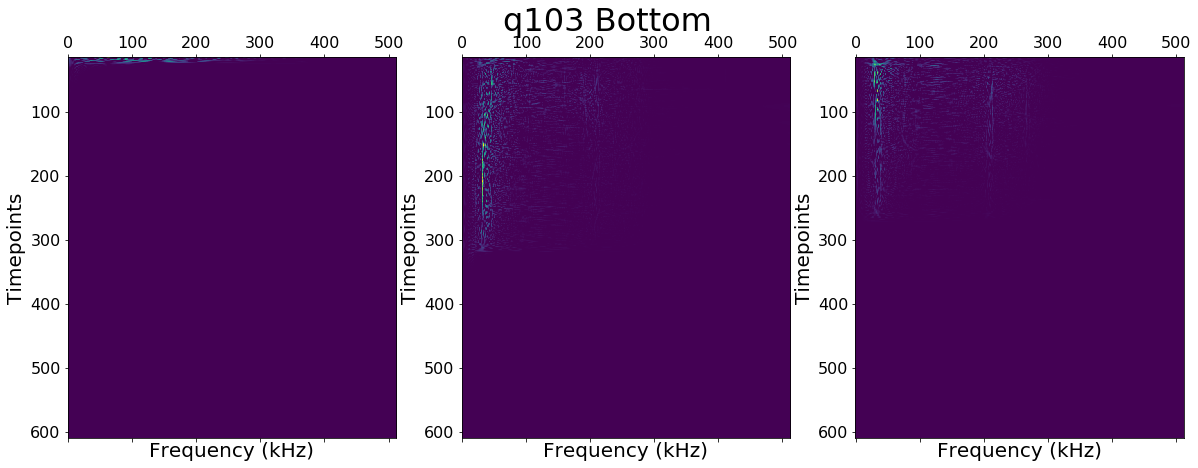

In [14]:
#quench 103 bottom

from matplotlib.pyplot import matshow

q103_bottom = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (boundary1 < i <= boundary2):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (bottomvxmin<pca0<bottomvxmax) and (bottomvymin<pca1<bottomvymax):
            q103_bottom.append(i)
        
print("q103_bottom")        
print(q103_bottom)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_bottom, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_l.set_xlabel('Frequency (kHz)')
ax_l.set_ylabel('Timepoints')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_c.set_xlabel('Frequency (kHz)')
ax_c.set_ylabel('Timepoints')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
ax_r.set_xlabel('Frequency (kHz)')
ax_r.set_ylabel('Timepoints')
fig.suptitle('q103 Bottom', fontsize=32)
plt.show()

q103_left
[3213, 3235, 3250, 3264, 3276, 3331, 3352, 3361, 3365, 3377, 3382, 3418, 3507, 3745, 3873, 3927, 3948, 3956, 3959, 3963, 3990, 4012, 4029, 4038, 4077, 4081, 4119, 4140, 4155, 4157, 4161, 4163, 4179, 4190, 4208, 4209, 4223, 4232, 4256, 4266, 4286, 4289, 4318, 4327, 4369, 4405, 4410, 4424, 4440, 4455, 4467, 4494, 4504, 4514, 4515, 4524, 4534, 4542, 4544, 4573, 4576, 4600, 4620, 4622, 4654, 4672, 4674, 4693, 4700, 4707, 4708, 4730, 4734, 4744, 4750, 4751, 4775, 4778, 4792, 4808, 4822, 4834, 4839, 4847, 4863, 4882, 4883, 4888, 4890, 4895, 4905, 4957, 4958, 4984, 4987, 4988, 5003, 5009, 5010, 5021, 5025, 5035, 5038, 5040, 5044, 5054, 5064, 5089, 5101, 5110, 5127, 5130, 5140, 5145, 5161, 5181, 5182, 5197, 5208, 5215, 5225, 5230, 5253, 5271, 5280, 5291, 5292, 5295, 5303, 5323, 5339, 5355, 5357, 5360, 5361, 5392, 5398, 5402, 5405, 5406, 5407, 5408, 5410, 5431, 5438, 5440, 5441, 5447, 5461, 5462, 5471, 5503, 5507, 5512, 5518, 5519, 5525, 5528, 5529, 5532, 5537, 5542, 5545, 5546, 5567,

<Figure size 2160x720 with 0 Axes>

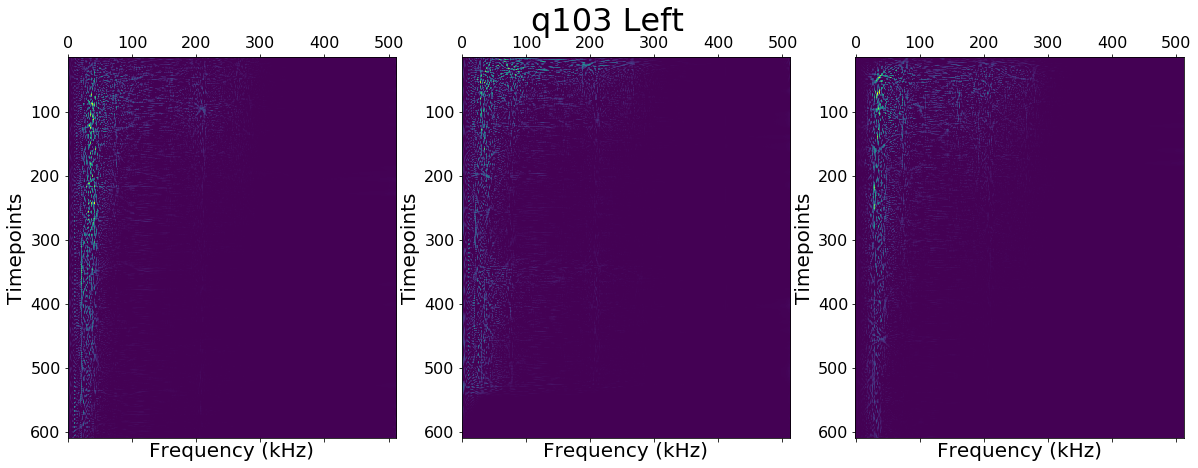

In [15]:
#quench 103 left

from matplotlib.pyplot import matshow

q103_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (boundary1 < i <= boundary2):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q103_left.append(i)
        
print("q103_left")        
print(q103_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_l.set_xlabel('Frequency (kHz)')
ax_l.set_ylabel('Timepoints')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_c.set_xlabel('Frequency (kHz)')
ax_c.set_ylabel('Timepoints')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
ax_r.set_xlabel('Frequency (kHz)')
ax_r.set_ylabel('Timepoints')
fig.suptitle('q103 Left', fontsize=32)
plt.show()

q103_right
[3885, 4022, 4061, 4130, 4419, 4450, 4581, 4611, 4679, 4682, 4786, 4787, 4799, 4816, 4914, 4951, 5019, 5155, 5284, 5312, 5383, 5387, 5393, 5417, 5470, 5535, 5562, 5579, 5631, 5656, 5679, 5707, 5817, 5933, 5959, 6007, 6219, 6231, 6237, 6270, 6310, 6311, 6332, 6347, 6396, 6432, 6445, 6530, 6659, 6685, 6763, 6802, 6840, 6960, 7006, 7010, 7013, 7015, 7124, 7149, 7158, 7166, 7176, 7187, 7224, 7273, 7338, 7366, 7408, 7625, 7656, 8367, 8648, 8819, 8942, 8966, 9003, 9151, 9242, 9381, 9444, 9510, 9513, 9603]
These are the random images we chose to display:
[4682 6659 7338]


<Figure size 2160x720 with 0 Axes>

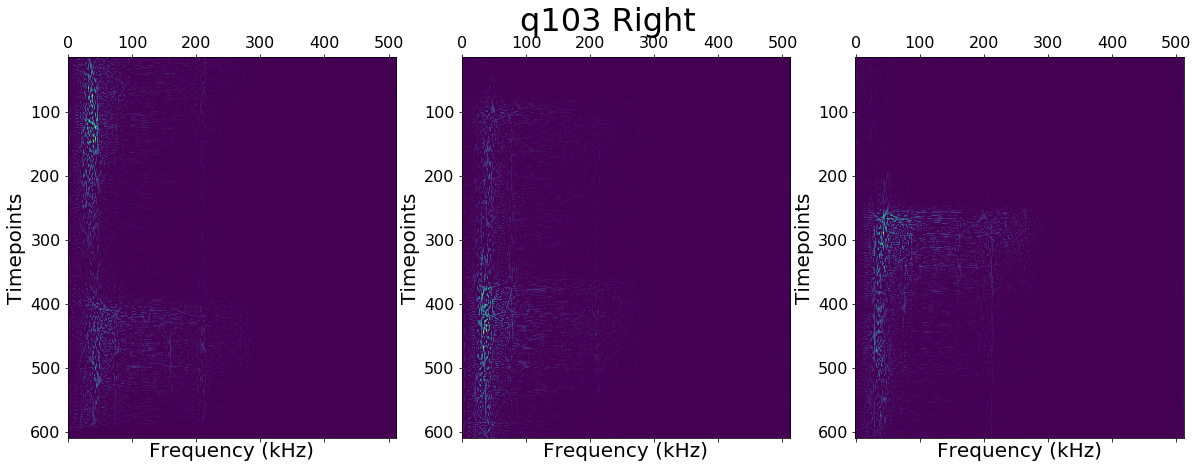

In [16]:
#quench 103 right

from matplotlib.pyplot import matshow

q103_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (boundary1 < i <= boundary2):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q103_right.append(i)
        
print("q103_right")        
print(q103_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_l.set_xlabel('Frequency (kHz)')
ax_l.set_ylabel('Timepoints')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_c.set_xlabel('Frequency (kHz)')
ax_c.set_ylabel('Timepoints')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
ax_r.set_xlabel('Frequency (kHz)')
ax_r.set_ylabel('Timepoints')
fig.suptitle('q103 Right', fontsize=32)
plt.show()

pq_bottom
[9788, 9789, 9790, 9791, 9792, 9793, 9794, 9795, 9797, 9798, 9799, 9800, 9801, 9802, 9803, 9804, 9806]
These are the random images we chose to display:
[9797 9790 9791]


<Figure size 2160x720 with 0 Axes>

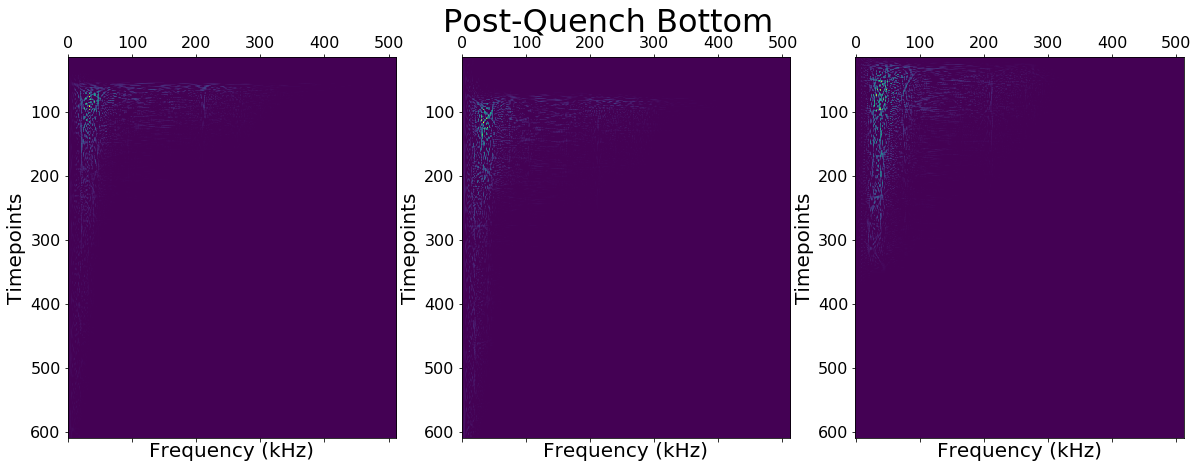

In [17]:
#postquench bottom

from matplotlib.pyplot import matshow

pq_bottom = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if i > boundary2:
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (bottomvxmin<pca0<bottomvxmax) and (bottomvymin<pca1<bottomvymax):
            pq_bottom.append(i)
        
print("pq_bottom")        
print(pq_bottom)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(pq_bottom, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_l.set_xlabel('Frequency (kHz)')
ax_l.set_ylabel('Timepoints')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_c.set_xlabel('Frequency (kHz)')
ax_c.set_ylabel('Timepoints')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
ax_r.set_xlabel('Frequency (kHz)')
ax_r.set_ylabel('Timepoints')
fig.suptitle('Post-Quench Bottom', fontsize=32)
plt.show()